# Level 2 – Task 2: Cuisine Combination

## 🔍 Objective:
1. Identify the most common combinations of cuisines.
2. Analyze if certain cuisine combinations lead to higher ratings.

## 🛠️ Approach:
- Clean and split the `Cuisines` column.
- Count frequency of cuisine pairs or sets.
- Group by cuisine combo to calculate average rating.
- Highlight top frequent and top-rated combinations.

## 📈 Insights:
This task shows what cuisine pairings are trending and whether certain combos tend to score better with customers.

Top 10 Cuisine Combos:
               Cuisine Combination  Count
0                    North Indian    936
1           North Indian, Chinese    511
2                         Chinese    354
3                       Fast Food    354
4           North Indian, Mughlai    334
5                            Cafe    299
6                          Bakery    218
7  North Indian, Mughlai, Chinese    197
8                Bakery, Desserts    170
9                     Street Food    149


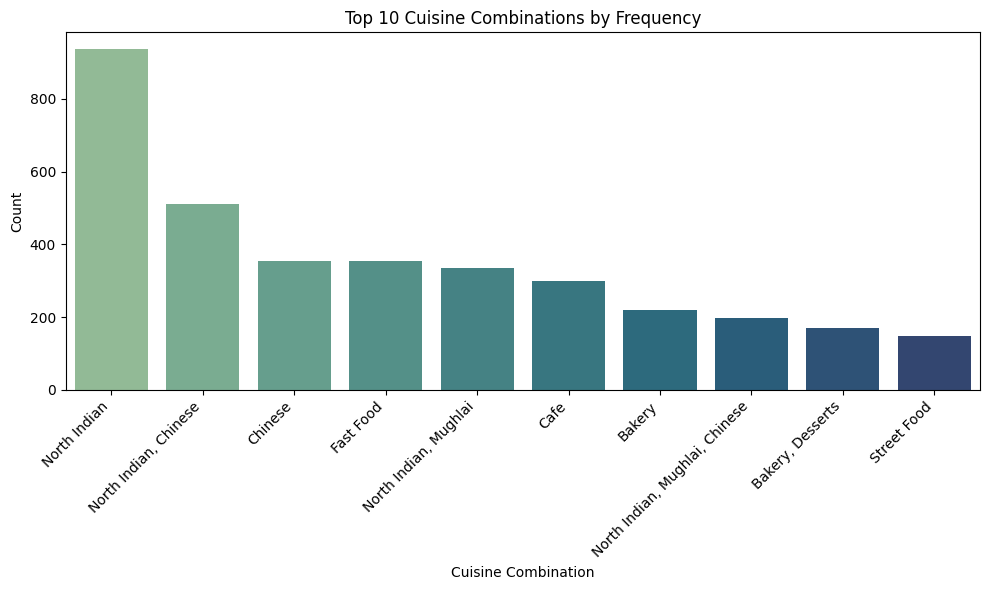

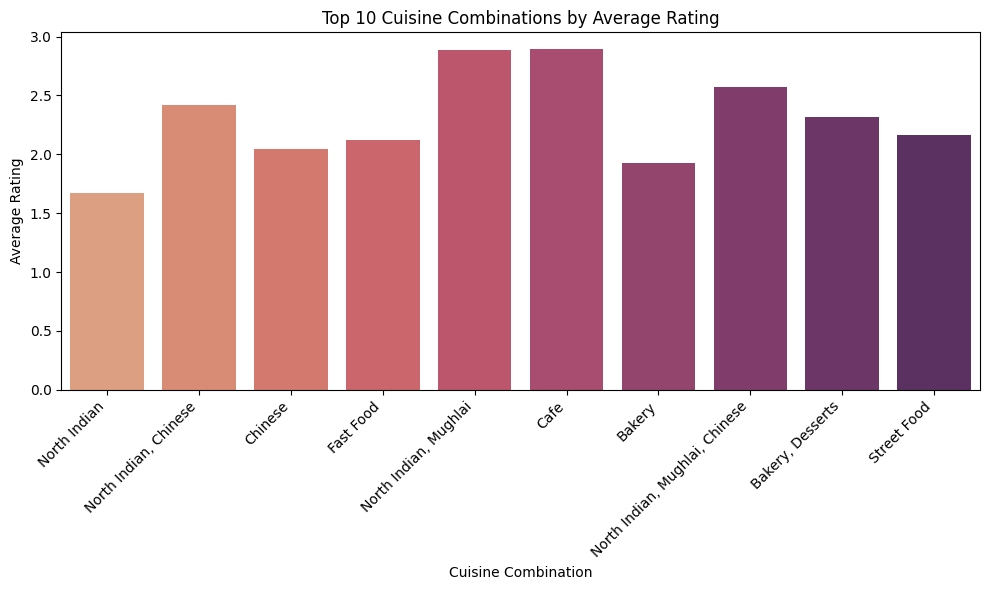

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load dataset
df = pd.read_csv("../Dataset.csv")

# Clean & prep
df = df.dropna(subset=['Cuisines', 'Aggregate rating'])
df['Cuisines'] = df['Cuisines'].str.strip()
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

# Count frequent cuisine combinations
combo_counts = df['Cuisines'].value_counts().reset_index()
combo_counts.columns = ['Cuisine Combination', 'Count']

# Top 10 combinations
top_combos = combo_counts.head(10)
print("Top 10 Cuisine Combos:\n", top_combos)

# Ratings for top 10 combos
top_combo_ratings = df[df['Cuisines'].isin(top_combos['Cuisine Combination'])]
avg_rating_per_combo = top_combo_ratings.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
avg_rating_per_combo.columns = ['Cuisine Combination', 'Average Rating']

# Merge for final output
combo_summary = pd.merge(top_combos, avg_rating_per_combo, on='Cuisine Combination')

# Plot (clean)
plt.figure(figsize=(10,6))
sns.barplot(data=combo_summary, x='Cuisine Combination', y='Count', hue='Cuisine Combination', palette='crest', legend=False)
plt.title("Top 10 Cuisine Combinations by Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=combo_summary, x='Cuisine Combination', y='Average Rating', hue='Cuisine Combination', palette='flare', legend=False)
plt.title("Top 10 Cuisine Combinations by Average Rating")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()